# Auto encoder

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [147]:
# function to generate all binary numbers given a length.
import numpy as np
def data_gen(digits):
    vfunc = np.vectorize(np.binary_repr)
    x = (vfunc(range(2**digits),width=digits).repeat(1))
    x = np.array([list(x[i]) for i in range(x.shape[0])]).astype(int)
    return x

data=data_gen(3)
data

array([[0, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 1],
       [1, 0, 0],
       [1, 0, 1],
       [1, 1, 0],
       [1, 1, 1]])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_23 (InputLayer)            (None, 3)             0                                            
____________________________________________________________________________________________________
dense_48 (Dense)                 (None, 3)             12          input_23[0][0]                   
____________________________________________________________________________________________________
encoded (Dense)                  (None, 2)             8           dense_48[0][0]                   
____________________________________________________________________________________________________
dense_49 (Dense)                 (None, 3)             9           encoded[0][0]                    
___________________________________________________________________________________________

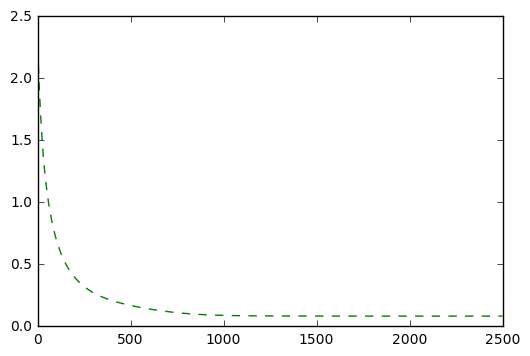

In [154]:
from keras.layers import Input, Reshape, Dense
from keras.models import Model

input1 = Input(shape=(3,))
x = Dense(3,activation='linear')(input1)
x = Dense(2,activation='linear', name="encoded")(x)
x = Dense(3,activation='linear')(x)
prediction = Dense(3,activation='linear')(x)

model_0 = Model(input=input1, output=prediction)
model_0.compile(loss='mean_squared_error', optimizer ='adam', metrics=['mean_absolute_error'])
model_0.summary()

model_0.fit(data,data,batch_size=100, nb_epoch=2500, verbose=0)

plt.plot(model_0.history.epoch, model_0.history.history['loss'], 'g--')
print ("loss:",model_0.history.history['loss'][-1],"mae:",model_0.history.history['mean_absolute_error'][-1])

In [155]:
# get the middle layer out.
import pandas as pd
model_2 = Model(input=input1, output=model_0.get_layer("encoded").output)

data1=pd.DataFrame(model_2.predict(data),columns=['x1','x2'])
txt=[str(data[i]) for i in range(data.shape[0])]
txt=pd.DataFrame(txt,columns=['txt'])

data1=pd.concat((data1,txt),axis=1)
data1


,x1,x2,txt
0,-0.211164,-0.141731,[0 0 0]
1,0.346064,0.109948,[0 0 1]
2,0.271287,-0.792086,[0 1 0]
3,0.828516,-0.540407,[0 1 1]
4,-0.739854,-0.627826,[1 0 0]
5,-0.182625,-0.376147,[1 0 1]
6,-0.257402,-1.278180,[1 1 0]
7,0.299826,-1.026501,[1 1 1]


In [156]:
# plot
import bokeh.plotting as bk
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, LabelSet

bk.output_notebook()

source = ColumnDataSource(data1)

toolbar="pan,wheel_zoom,box_zoom,reset"
p = figure(tools=toolbar, toolbar_location="above")
p.circle("x1", "x2",source=source)
#p.line("x1", "x2",source=source)   

    
labels = LabelSet(x="x1", y="x2", text="txt",text_font_size="8pt", source=source)
p.add_layout(labels)

    
show(p)

Loading BokehJS ...

# Fun with spirals

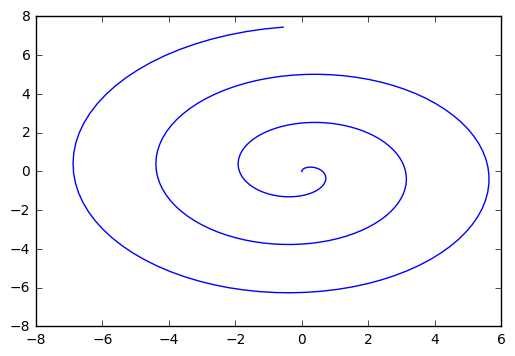

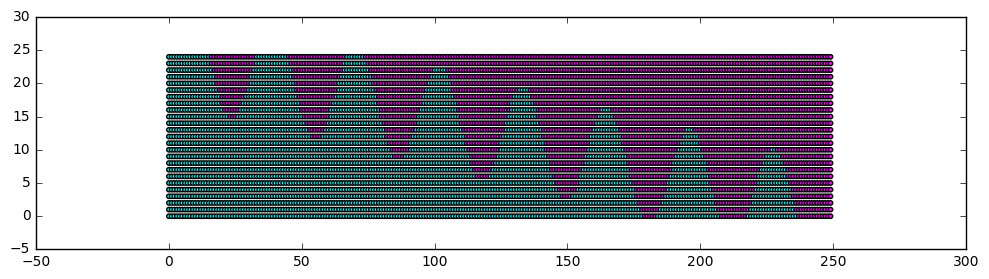

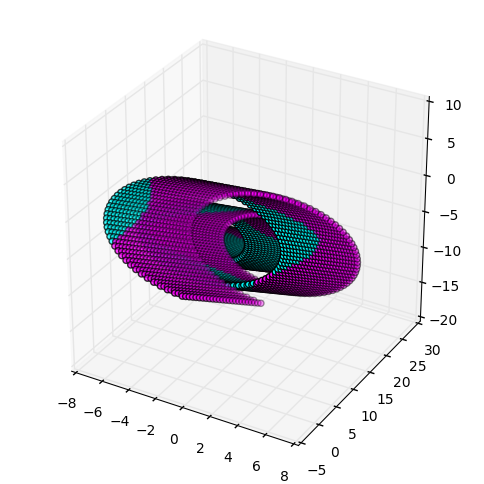

In [329]:
i=np.arange(0,250)
rad=2*np.pi/250*3*i
r=i/100.*3
x=r*np.sin(rad)
y=r*np.cos(rad)
plt.figure(1)
plt.plot(x,y)

data=pd.DataFrame(np.stack((i,rad,r,x,y),axis=1),columns=['i','rad','r','x','y'])
data1=pd.DataFrame()

for ii in range(25):
    data['z']=ii
    data1=pd.concat((data1,data))

data1=data1.sort_values(['i','z'])
data1=data1.reset_index()

data1['target']=((25.-(25./250.)*data1['i'] + 8*np.sin(data1['i']/5.)) < data1['z'] ).astype(int)    

plt.figure(2,figsize=(12,3))
plt.scatter(data1['i'],data1['z'],c=data1['target'],cmap='cool',s=10)
plt.show()

angle=90
trans=[[1,0,0],[0,np.cos(angle),-np.sin(angle)],[0,np.sin(angle),np.cos(angle)]]
data1[['x1','y1','z1']]=data1[['x','y','z']].dot(trans)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data1['x1'], data1['y1'], data1['z1'],c=data1['target'],cmap='cool')

plt.show()


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_45 (InputLayer)            (None, 3)             0                                            
____________________________________________________________________________________________________
dense_150 (Dense)                (None, 12)            48          input_45[0][0]                   
____________________________________________________________________________________________________
dense_151 (Dense)                (None, 6)             78          dense_150[0][0]                  
____________________________________________________________________________________________________
encoded (Dense)                  (None, 2)             14          dense_151[0][0]                  
___________________________________________________________________________________________

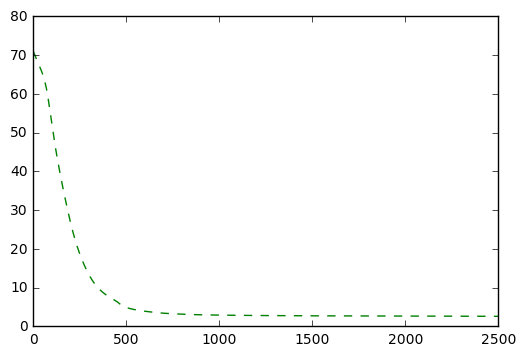

In [400]:
from keras.layers import Input, Reshape, Dense
from keras.models import Model

input1 = Input(shape=(3,))
x = Dense(12,activation='relu')(input1)
x = Dense(6,activation='tanh')(x)
x = Dense(2,activation='linear', name="encoded")(x)
x = Dense(6,activation='tanh')(x)
x = Dense(12,activation='relu')(x)
prediction = Dense(3,activation='linear')(x)

model_3 = Model(input=input1, output=prediction)
model_3.compile(loss='mean_squared_error', optimizer ='adam', metrics=['mean_absolute_error'])
model_3.summary()

model_3.fit(data1[['x1','y1','z1']].values,data1[['x1','y1','z1']].values,batch_size=6250, nb_epoch=2500, verbose=0)

plt.plot(model_3.history.epoch, model_3.history.history['loss'], 'g--')
print ("loss:",model_3.history.history['loss'][-1],"mae:",model_3.history.history['mean_absolute_error'][-1])

In [401]:
# get the middle layer out.
import pandas as pd
model_4 = Model(input=input1, output=model_3.get_layer("encoded").output)

data2=pd.concat((data1,pd.DataFrame(model_4.predict(data1[['x1','y1','z1']].values),columns=['f1','f2'])),axis=1)
data2.head()


,index,i,rad,r,x,y,z,target,x1,y1,z1,f1,f2
0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.000000,0.000000,0.723040,-0.327490
1,0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.893997,-0.448074,0.556217,-0.195402
2,0,0.0,0.0,0.0,0.0,0.0,2,0,0.0,1.787993,-0.896147,0.412666,-0.185681
3,0,0.0,0.0,0.0,0.0,0.0,3,0,0.0,2.681990,-1.344221,0.351389,-0.177452
4,0,0.0,0.0,0.0,0.0,0.0,4,0,0.0,3.575987,-1.792294,0.289117,-0.169658


In [402]:
# plot
import bokeh.plotting as bk
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, LabelSet,LinearColorMapper
from bokeh.palettes import Category20

bk.output_notebook()

source = ColumnDataSource(data2)

mapper=LinearColorMapper(palette=Category20[20], low=0,high=1)

toolbar="pan,wheel_zoom,box_zoom,reset"
p = figure(tools=toolbar, toolbar_location="above")
p.circle("f1", "f2",fill_color={'field': "target", 'transform': mapper},line_color=None,source=source)
#p.line("x1", "x2",source=source)   

    
#labels = LabelSet(x="x1", y="x2", text="txt",text_font_size="8pt", source=source)
#p.add_layout(labels)

    
show(p)

Loading BokehJS ...